In [47]:
import sys, subprocess

print("Interpreter used by this notebook:", sys.executable)
print("Installing numpy==2.0.* and ineqpy into THIS interpreter...")

subprocess.check_call(
    [sys.executable, "-m", "pip", "install", "numpy==2.0.*", "ineqpy"]
)
print("Done. Now restart the kernel (Kernel > Restart) and re-run your imports.")

Interpreter used by this notebook: c:\Users\User\miniforge3\python.exe
Installing numpy==2.0.* and ineqpy into THIS interpreter...
Done. Now restart the kernel (Kernel > Restart) and re-run your imports.


In [48]:
import numpy as np

incomes = np.loadtxt(
    "https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/us_household_incomes.txt"
)
from ineqpy.inequality import gini

## Exercise 2 — Plot the income distribution

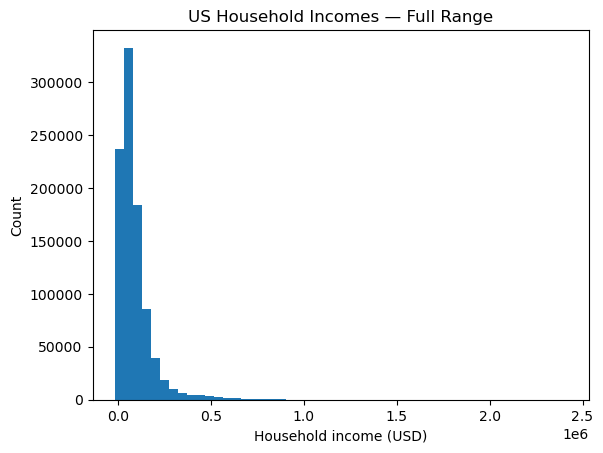

In [49]:
from matplotlib import pyplot as plt

plt.hist(incomes, bins=50)  # 50 bins for a clearer shape
plt.xlabel("Household income (USD)")
plt.ylabel("Count")
plt.title("US Household Incomes — Full Range")
plt.show()

# The distribution is right-skewed

## Exercise 3 — Histogram for non-millionaires (< $500k)

> Re-plot `incomes` but only for households earning **less than $500,000**.  
> Then interpret: is the distribution now closer to uniform, or **still right-skewed**?  
> Is the skewness driven only by extreme top earners, or evident across lower incomes too?

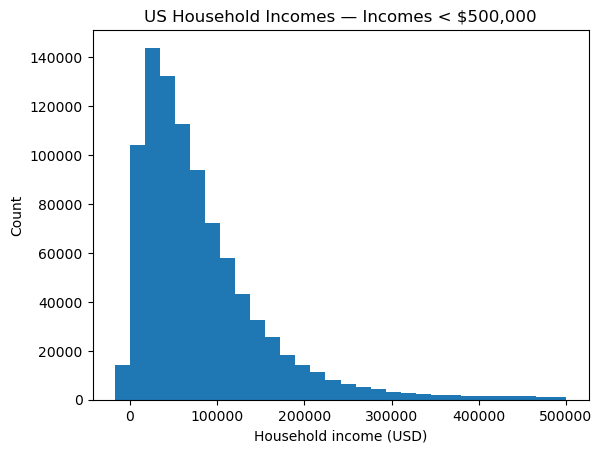

In [50]:
import numpy as np
from matplotlib import pyplot as plt

incomes_under_500k = incomes[incomes < 500_000].copy()

plt.hist(incomes_under_500k, bins=30)
plt.xlabel("Household income (USD)")
plt.ylabel("Count")
plt.title("US Household Incomes — Incomes < $500,000")
plt.show()

#Distribution is closer to normal as compared to the previous, but still right-skewed ie not driven by the high earners.

## Exercise 4 — Share below poverty line and Gini


In [51]:
# Calculating the gini index for all the hosueholds below the poverty line
import numpy as np
from ineqpy.inequality import gini

results = {}
ex4_gini = gini(incomes)
poverty_line = 20000
ex4_share_below_poverty = incomes[incomes < poverty_line]


# Save results and print
results["ex4_share_below_poverty"] = ex4_share_below_poverty.size / incomes.size
print(f"The gini index for the US (income) is: {ex4_gini:.3f}")
results["ex4_gini"] = ex4_gini

The gini index for the US (income) is: 0.481


#Exercise 5 - Compare Gini to other Countries

The US Gini at 0.48 is not at either of the global extremes. However it should be noted that when compared to Western Countries of similar development(Germany, Nordic countries, Canada etc) it is conisderably higher.

# Excercise 6 - Policies A & B and their effect on Gini

Policy A - Giving households with less than 40'000 dollars a check for 5'000
Policy B - Giving households with less than 30'000 dollars a check for 7'000

In [52]:
# Original Incomes
base = incomes.copy()

# Calculate effect of Policy A
policy_a = base.copy()
sub_a = policy_a < 40000
policy_a[sub_a] += 5000
ex5_gini_policy_a = gini(policy_a)

# Calculate effect of Policy B
policy_b = base.copy()
sub_b = policy_b < 30000
policy_b[sub_b] += 7000
ex6_gini_policy_b = gini(policy_b)

# Compare
ex6_gini_which_reduced_more = (
    "Policy A" if ex6_gini_policy_a < ex6_gini_policy_b else "Policy B"
)

# Store results
results["ex5_gini_policy_a"] = ex6_gini_policy_a
results["ex6_gini_policy_b"] = ex6_gini_policy_b
results["ex6_gini_which_reduced_more"] = ex6_gini_which_reduced_more

# Print results
print(f"Policy A Gini: {ex6_gini_policy_a:.4f}")
print(f"Policy B Gini: {ex6_gini_policy_b:.4f}")
print("Which reduced more:", ex6_gini_which_reduced_more)

Policy A Gini: 0.4602
Policy B Gini: 0.4583
Which reduced more: Policy B


Results show Policy B produces a lower Gini and is more effective than Policy A

#Exercise 7 - Comparison with Policy C

Policy C - applying a tax of 5% to households making abvoe 250'000 Dollars

In [ ]:
# Original Incomes
base = incomes.copy()

# Calculate effect of Policy C
policy_c = base.copy()
sub_c = policy_c > 250000
policy_c[sub_c] = policy_c[sub_c] * 0.95  # (100% - 5% tax deduction)
ex7_gini_policy_c = gini(policy_c)

# Store results
results["ex7_gini_policy_c"] = ex7_gini_policy_c

# Print
print(f"Policy C Gini: {ex7_gini_policy_c:.4f}")
print(f"Policy B Gini: {ex6_gini_policy_b:.4f}")

Policy C Gini: 0.4756
Policy B Gini: 0.4583


Policy B remains the one with the Lower Gini and is thus the most effective.

#Excercise 8 and 9 - Policy D

Policy D - Apply a tax of 5% to households with more than 250K and apply that to households earning less than 30K


In [54]:
# Original Income
base = incomes.copy()

# Calculate the revenue raised by the 5% tax
policy_d = base.copy()
sub_d = policy_d > 250000
amount = np.sum(0.05 * policy_d[sub_d])
ex8_revenue_raised = amount

# Store results
results["ex8_revenue_raised"] = ex8_revenue_raised

# Print results
print(f"Revenue Raised: ${ex8_revenue_raised:,.2f}")

# Distribute the amount
policy_b = base.copy()
sub_b = policy_b < 30000
number = int(np.count_nonzero(policy_b[sub_b]))
ex9_transfers = amount / number

# Store results
results["ex9_transfers"] = ex9_transfers

# Print
print(f"Eligible households to receive an additional sum: {number:,.2f}")

print(f"Amount to be transferred to each household: ${ex9_transfers:,.2f}")

Revenue Raised: $929,623,340.85
Eligible households to receive an additional sum: 208,087.00
Amount to be transferred to each household: $4,467.47


#Exercise 10 - Application of Policy D and effect on Gini

In [55]:
# Original Income
base = incomes.copy()

# Apply Policy D
policy_d = base.copy()
sub_d = policy_d > 250_000
policy_d[sub_d] = policy_d[sub_d] * 0.95  # 5% tax on > $250,000

# Transfer to < $30,000 (from Exercise 9)
transfer = results["ex9_transfers"]
sub_b = policy_d < 30_000
policy_d[sub_b] = policy_d[sub_b] + transfer

# Gini after Policy D
ex10_gini_policy_d = float(gini(policy_d))
results["ex10_gini_policy_d"] = ex10_gini_policy_d

print(f"Policy D Gini: {ex10_gini_policy_d:.4f}")

Policy D Gini: 0.4608


#Exercise 11 - Policy E

Policy E - Apply 5% tax on households with above 250K and distribute evenly across all households with less than 40K

In [56]:
# Original Income
base = incomes.copy()

# Apply Policy E
policy_e = base.copy()
sub_e = policy_e > 250_000
policy_e[sub_e] = policy_e[sub_e] * 0.95  # 5% tax on > $250,000

# Transfer to < $40,000
transfer = results["ex9_transfers"]
sub_b = policy_e < 40_000
policy_e[sub_b] = policy_e[sub_b] + transfer

# Gini after transfer
ex11_gini_policy_e = gini(policy_e)
results["ex11_gini_policy_e"] = ex11_gini_policy_e

# Print
print(f"Policy E Gini: {ex11_gini_policy_e:.4f}")

Policy E Gini: 0.4568


In [57]:
# Exercise 12 — pick the policy with the lower Gini
ex12_policy_recommendation = (
    "Policy D"
    if results["ex10_gini_policy_d"] < results["ex11_gini_policy_e"]
    else "Policy E"
)
results["ex12_policy_recommendation"] = ex12_policy_recommendation

print("Recommended policy:", ex12_policy_recommendation)

Recommended policy: Policy E
